In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('plant_sensors.csv')

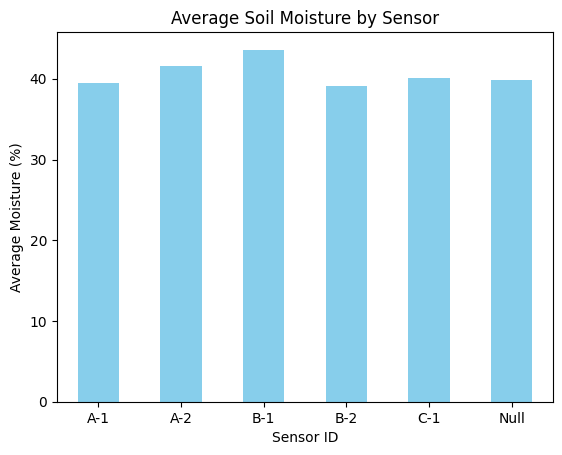

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['temperature_f'] = df['temperature_c'] * 9/5 + 32
df['soil_moisture'] = df['soil_moisture'].interpolate(method='linear')
df['timestamp'] = df['timestamp'].interpolate(method='linear')
df['sensor_id'] = df['sensor_id'].fillna('Null')
df['temperature_c'] = df['temperature_c'].interpolate(method='linear')
df['light_level'] = df['light_level'].interpolate(method='linear')
df['temperature_f'] = df['temperature_f'].interpolate(method='linear')
df.groupby(['sensor_id'])['soil_moisture'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Soil Moisture by Sensor')
plt.xlabel('Sensor ID')
plt.xticks(rotation=0)
plt.ylabel('Average Moisture (%)')
plt.show()

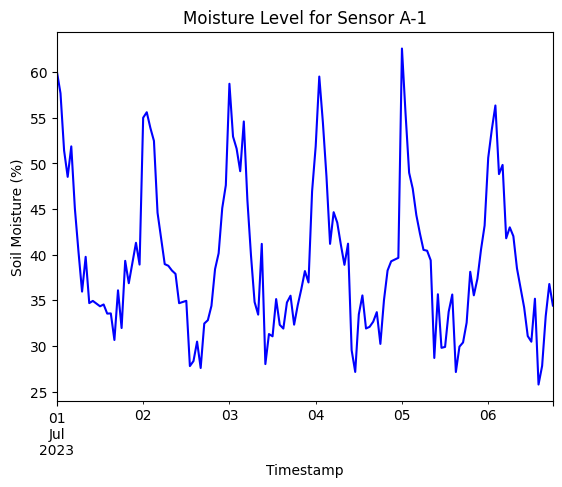

In [5]:
df.loc[df['sensor_id'] == 'A-1'].set_index('timestamp')['soil_moisture'].plot(kind='line', color='blue')
plt.title('Moisture Level for Sensor A-1')
plt.xlabel('Timestamp')
plt.ylabel('Soil Moisture (%)')
plt.show()

C:\Users\yueny\AppData\Local\Temp\ipykernel_32956\1635548893.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()


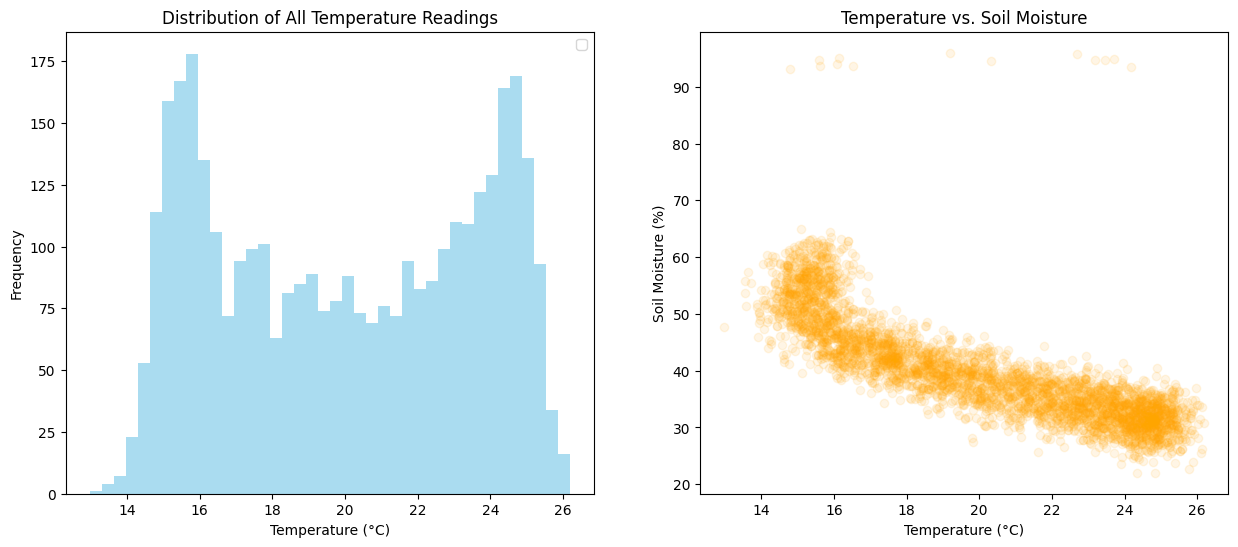

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].hist(df['temperature_c'], bins=40, color='skyblue', alpha=0.7)
axes[0].set_title('Distribution of All Temperature Readings')
axes[0].set_xlabel('Temperature (°C)')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[1].scatter(df['temperature_c'], df['soil_moisture'], color='orange', alpha=0.1)
axes[1].set_title('Temperature vs. Soil Moisture')
axes[1].set_xlabel('Temperature (°C)')
axes[1].set_ylabel('Soil Moisture (%)')
plt.show()

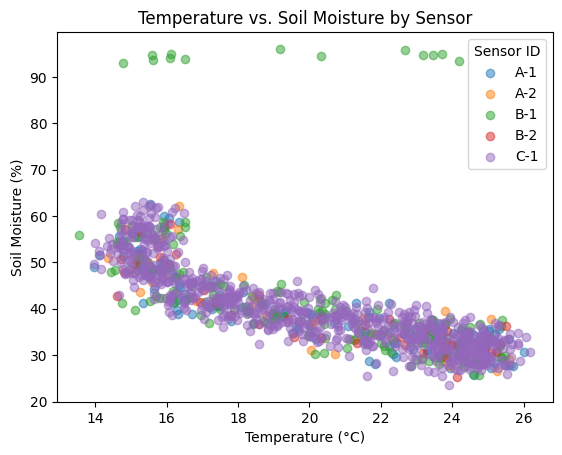

In [10]:
for sensor, group in df.groupby('sensor_id'):
    if sensor != 'Null':
        plt.scatter(group['temperature_c'], group['soil_moisture'], label=sensor, alpha=0.5)
plt.title('Temperature vs. Soil Moisture by Sensor')
plt.xlabel('Temperature (°C)')
plt.ylabel('Soil Moisture (%)')
plt.legend(title='Sensor ID')
plt.show()